In [62]:
from sympy import symbols, Matrix, init_printing, I, eye, Eq, solve, MatrixSymbol, trace, conjugate
from sympy.physics.quantum import Dagger
from sympy import LeviCivita
init_printing()

In [37]:
a, b, c, d = symbols('a b c d', real=True)
M = Matrix(
    [
        [a, b - I*c],
        [b + I*c, d]
    ]
)

In [38]:
sigma1 = Matrix(
    [
        [0, 1],
        [1, 0]
    ]
)
sigma2 = Matrix(
    [
        [0, -I],
        [I, 0]
    ]
)
sigma3 = Matrix(
    [
        [1, 0],
        [0, -1]
    ]
)
sigma0 = eye(2)

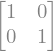

In [81]:
sigma2*sigma2

In [82]:
LeviCivita(0,0)*LeviCivita(0,0) + LeviCivita(0,1)*LeviCivita(1,0)

In [84]:
LeviCivita(0,0)*LeviCivita(0,1) + LeviCivita(0,1)*LeviCivita(1,1)

In [86]:
k=1
m=1
res = 0
for l in range(2):
    res += LeviCivita(k,l)*LeviCivita(l,m)
res

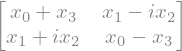

In [39]:
x0, x1, x2, x3 = symbols('x0 x1 x2 x3', real=True)
R = x0*sigma0 + x1*sigma1 + x2*sigma2 + x3*sigma3
R

In [40]:
eqs = []
for i in range(2):
    for j in range(2):
        eqs.append(Eq(M[i, j], R[i, j]))
eqs

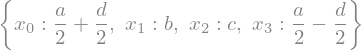

In [41]:
solve(eqs, (x0, x1, x2, x3), dict=True)[0]

In [42]:
phi10, phi1p = symbols(r'\phi_1^0, \phi_1^+')
phi20, phi2p = symbols(r'\phi_2^0, \phi_2^+')
Phi1 = Matrix(
    [
        [phi1p],
        [phi10]
    ]
)
Phi2 = Matrix(
    [
        [phi2p],
        [phi20]
    ]
)

In [43]:
Phi1DPhi1 = (Dagger(Phi1)*sigma0*Phi1)[0]
Phi1DPhi1 

## Bidoublet contractions

In [44]:
Phi = MatrixSymbol('Phi', 2, 2)
PhiDPhi = Dagger(Phi)*Phi
PhiDPhi

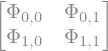

In [46]:
Phi.as_explicit()

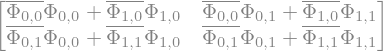

In [ ]:
PhiDPhi.as_explicit()

In [48]:
trace(PhiDPhi.as_explicit())

In [52]:
Phi[0,0]

In [58]:
#i=1
#j=1
res = 0
for k in range(2):
    for i in range(2):
        term = conjugate(Phi[k, i])*Phi[k, i]
        #display(term)
        res += term
res


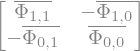

In [50]:
Phitilde = sigma2*conjugate(Phi)*sigma2
Phitilde.as_explicit()

We have the following result 
$$
\text{Tr}\left(\Phi^{\dagger}\tilde{\Phi}\right)^{2} = \epsilon_{kl}\epsilon_{mi}\epsilon_{pq}\epsilon_{rs}\Phi_{ki}^{*}\Phi_{lm}^{*}\Phi_{ps}^{*}\Phi_{qr}^{*}
$$

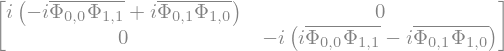

In [59]:
PhiDPhitilde = Dagger(Phi)*Phitilde
PhiDPhitilde.as_explicit()

In [69]:
# \epsilon_{kl}\epsilon_{mi}\epsilon_{pq}\epsilon_{rs}\Phi_{ki}^{*}\Phi_{lm}^{*}\Phi_{ps}^{*}\Phi_{qr}^{*}
res = 0
for i in range(2):
    for k in range(2):
        for l in range(2):
            for m in range(2):
                for p in range(2):
                    for q in range(2):
                        for r in range(2):
                            for s in range(2):
                                term = (
                                    LeviCivita(k,l)*LeviCivita(m,i)*LeviCivita(p,q)*LeviCivita(r,s)*
                                    conjugate(Phi[k,i])*conjugate(Phi[l,m])*
                                    conjugate(Phi[p,s])*conjugate(Phi[q,r])
                                )

                                res += term

In [76]:
# Test of the result is equal to the trace squared of PhiDPhitilde
res.factor() == (trace(PhiDPhitilde.as_explicit())**2).factor()

True

In [71]:
import itertools

# Assume LeviCivita, conjugate, and Phi are defined in the global scope
# as they were for the original code.
# For example:
# import cmath
# import numpy as np
# conjugate = np.conjugate # or cmath.conjugate if Phi elements are scalar
# Phi = np.zeros((2,2), dtype=complex) # Example initialization
# def LeviCivita(a, b): # Example definition, properties are used implicitly below
#     if a == b: return 0
#     if (a,b) == (0,1): return 1
#     if (a,b) == (1,0): return -1
#     return 0 # Should not happen for a,b in {0,1}

res_improved = 0

# The original loop over 'j' was unused. If it was intended to multiply
# the result by 2, that factor should be applied to 'res_improved' at the end.
# We assume here it was an oversight.

# We iterate over the 4 independent indices: k, m, p, r.
# Each ranges from 0 to 1.
for k_idx, m_idx, p_idx, r_idx in itertools.product(range(2), repeat=4):
    
    # Determine dependent indices based on Levi-Civita properties
    # l_idx = 1 - k_idx (from LeviCivita(k,l))
    # i_idx = 1 - m_idx (from LeviCivita(m,i))
    # q_idx = 1 - p_idx (from LeviCivita(p,q))
    # s_idx = 1 - r_idx (from LeviCivita(r,s))

    # The product of LeviCivita symbols results in a sign factor:
    # LeviCivita(k,1-k) * LeviCivita(m,1-m) * LeviCivita(p,1-p) * LeviCivita(r,1-r)
    # Assuming LeviCivita(x, 1-x) = (-1)^x (e.g., LC(0,1)=1, LC(1,0)=-1),
    # the product is (-1)^(k_idx + m_idx + p_idx + r_idx).
    exponent_sum = k_idx + m_idx + p_idx + r_idx
    sign = 1 if exponent_sum % 2 == 0 else -1
    
    # Original Phi term product:
    # conjugate(Phi[k,i])*conjugate(Phi[l,m])*conjugate(Phi[p,s])*conjugate(Phi[q,r])
    # Substitute dependent indices:
    # i_idx = 1-m_idx
    # l_idx = 1-k_idx
    # s_idx = 1-r_idx
    # q_idx = 1-p_idx
    
    phi_term_product = (
        conjugate(Phi[k_idx, 1-m_idx]) *    # conjugate(Phi[k,i])
        conjugate(Phi[1-k_idx, m_idx]) *    # conjugate(Phi[l,m])
        conjugate(Phi[p_idx, 1-r_idx]) *    # conjugate(Phi[p,s])
        conjugate(Phi[1-p_idx, r_idx])     # conjugate(Phi[q,r])
    )
    
    res_improved += sign * phi_term_product

# At this point, res_improved holds the calculated sum.
# If the original 'j' loop meant to double the result:
# res_improved *= 2


Now, for 
$$
\text{Tr}\left(\tilde{\Phi}^{\dagger}\Phi\right)^{2} = \epsilon_{ik}\epsilon_{lm}\epsilon_{pq}\epsilon_{rs}\Phi_{lk}\Phi_{mi}\Phi_{rq}\Phi_{sp}
$$

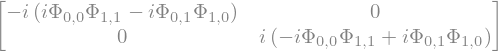

In [77]:
PhitildeDPhi = Dagger(Phitilde)*Phi
PhitildeDPhi.as_explicit()

In [78]:
# \epsilon_{ik}\epsilon_{lm}\epsilon_{pq}\epsilon_{rs}\Phi_{lk}\Phi_{mi}\Phi_{rq}\Phi_{sp}
res = 0
for i in range(2):
    for k in range(2):
        for l in range(2):
            for m in range(2):
                for p in range(2):
                    for q in range(2):
                        for r in range(2):
                            for s in range(2):
                                term = (
                                    LeviCivita(i,k)*LeviCivita(l,m)*LeviCivita(p,q)*LeviCivita(r,s)*
                                    Phi[l,k]*Phi[m,i]*
                                    Phi[r,q]*Phi[s,p]
                                )

                                res += term

In [79]:
# Test of the result is equal to the trace squared of PhitildeDPhi
res.factor() == (trace(PhitildeDPhi.as_explicit())**2).factor()

True

In [80]:
res.factor()